# Pok&eacute;mon example

This example applies a multiplicative handicap to the Pok&eacute;mon type chart (Generation VI).

## Finding the results

In [1]:
import _initpath

import numpy
import dataset.pokemon
import zerosum.balance
import zerosum.nash
import matplotlib
import matplotlib.pyplot as plt

type_chart = dataset.pokemon.pokemon_6
# Vector of color codes for the types.
colors = [dataset.pokemon.pokemon_type_colors[name] for name in type_chart.row_names]

After importing the dataset, we find the Nash equilibrium of the original game and the handicaps that produce a uniform Nash equilibrium.

In [2]:
row_nash, col_nash = zerosum.nash.nash(type_chart.data)
balance_result = zerosum.balance.MultiplicativeBalance(type_chart.data).optimize()

## Plotting the results

With the result in hand, we make a scatter plot of the Nash equilibrium of the initial game versus the (log) handicaps that produce a uniform Nash equilibrium. We make two subplots, one for the attacker and one for the defender. 

### Attacker plot

In [3]:
dpi = 240
marker_size = 64
text_size = 15
loc = matplotlib.ticker.MultipleLocator(base=0.1)

fig = plt.figure(figsize = (18, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax = plt.subplot(gs[0])

We draw a line indicating where a uniform Nash equilibrium would lie.

In [4]:
uniform_x = 1.0 / len(row_nash.strategy)
ax.plot([uniform_x, uniform_x], [-0.2, 0.25],
        color='#bfbfbf', linestyle='-', zorder=0)
plt.text(uniform_x, -0.203, 'Uniform',
         fontsize = 12,
         rotation = 0,
         ha = 'center', va = 'top');

Now for the scatter plot proper.

In [5]:
x = row_nash.strategy
y = numpy.log(balance_result.row_handicaps)
y -= numpy.mean(y)

ax.scatter(x, y, s = marker_size, c = colors);

We label each scatter plot point with the corresponding type name. Some manual position adjustment is involved.

In [6]:
for pointx, pointy, name, color in zip(x, y, type_chart.row_names, colors):
    ha = 'left'
    # manual adjustment
    if name in ['Flying']:
        pointy -= 0.005
    if name in ['Dark']:
        pointy -= 0.01
    if name in ['Fairy']:
        pointx -= 0.005
        pointy -= 0.015
    if name in ['Ground']:
        ha = 'right'
    
    name = ' ' + name + ' '
    plt.text(pointx, pointy, name,
             fontsize = text_size,
             rotation = 0,
             ha = ha, va = 'center')

ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_title('Attacker')

ax.set_xlabel('Nash probability of initial game', fontsize = text_size)
ax.set_ylabel('Log (handicap) producing uniform Nash', fontsize = text_size)

ax.set_xlim(left=0.0, right = 0.3)
ax.set_ylim(bottom=-0.2, top = 0.25);

### Defender plot

Now the same thing for the defender.

In [7]:
ax = plt.subplot(gs[1])

uniform_x = 1.0 / len(col_nash.strategy)
ax.plot([uniform_x, uniform_x], [-0.2, 0.25],
        color='#bfbfbf', linestyle='-', zorder=0)
plt.text(uniform_x, -0.203, 'Uniform',
         fontsize = 12,
         rotation = 0,
         ha = 'center', va = 'top')

x = col_nash.strategy
y = numpy.log(balance_result.col_handicaps)
y -= numpy.mean(y)

ax.scatter(x, y, s = marker_size, c = colors)

for pointx, pointy, name, color in zip(x, y, type_chart.row_names, colors):
    ha = 'left'
    # manual adjustment
    if name in ['Dark']:
        pointx -= 0.002
        pointy += 0.012
    if name in ['Dragon', 'Fighting']:
        pointy -= 0.01
    if name in ['Normal']:
        ha = 'right'
    
    name = ' ' + name + ' '
    plt.text(pointx, pointy, name,
             fontsize = text_size,
             rotation = 0,
             ha = ha, va = 'center')

ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_title('Defender')

ax.set_xlabel('Nash probability of initial game', fontsize = text_size)
ax.yaxis.set_ticklabels([])

ax.set_xlim(left=0.0, right = 0.3)
ax.set_ylim(bottom=-0.2, top = 0.25)

plt.tight_layout();

Finally we save and display the figure.

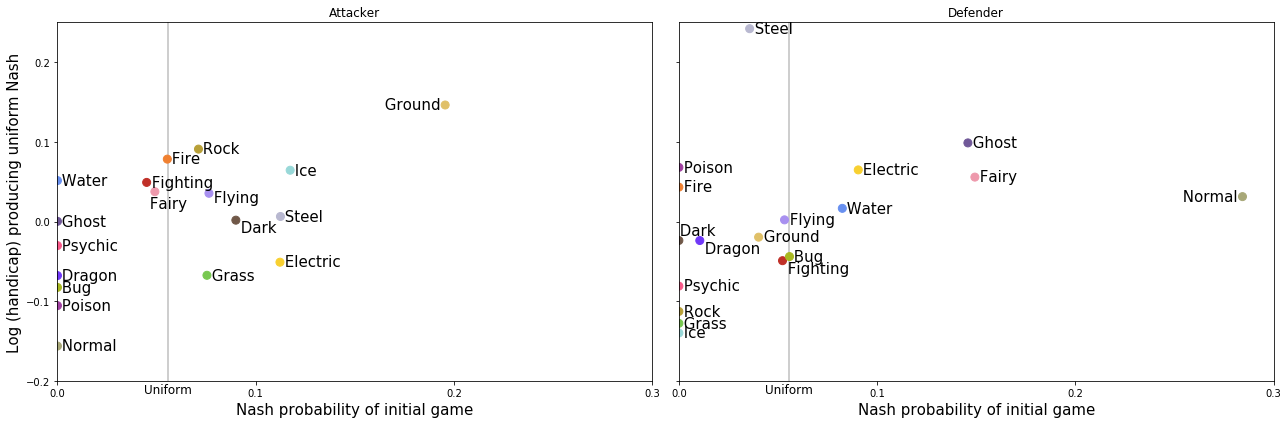

In [8]:
plt.savefig("out/pokemon_scatter.png", dpi = dpi, bbox_inches = "tight")
plt.show()